# Amazon Beauty Products Review-Sentiment Analysis

## Import Necessary Libraries

In [52]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Decompress the Amazon Review Dataset 

The dataset is obtained from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Beauty_10.json.gz link and uploaded into Jupyter notebook via the following code. 

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('C:/users/eturk/Data_Science/Capstone_Project-Sentiment_Analysis/Dataset/reviews_Beauty_10.json.gz')

## Inspecting the Dataset

In [3]:
# Shape of the dataset
df.shape

(28798, 9)

In [4]:
# Read the file
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5.0,If I had to choose only one product to take ca...,1245283200,"06 18, 2009"
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5.0,Makes my skin lovely and smooth,1358467200,"01 18, 2013"
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5.0,Works well at a reasonable price,1322524800,"11 29, 2011"
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4.0,This does work ladies,1113350400,"04 13, 2005"
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1.0,Did not like the feel/texture of this serum,1387584000,"12 21, 2013"


In [5]:
# Inspect the structure of the dataframe
df.sample(10).transpose()

,23590,20441,23941,23218,13257,5743,9619,2430,8162,2656
reviewerID,A1F7YU6O5RU432,A1DGB6HY5C7LXU,A1ZZZT0KJR46UV,A19WEEGB05YAZ3,A36MP37DITBU6F,A2IK5CHTYMHMRX,A319Y83RT0MRVR,AGXV8E7XK9J6H,A1LG1DKUZXGJ6J,A3UKWQS8SRW6IO
asin,B00GTC0DFK,B00DLRNSSK,B00GTC1HCI,B00GTBZOVE,B009RNUH7M,B004DJUHMA,B007A592HU,B001JQLNJ6,B00639DLV2,B001LF4G7G
reviewerName,Angela Streiff,Brianna Greene,Darla Mcgranaghan,J. Weaver,"Enchanted In Dixie ""Enchanted""",Valeri B,AIROLF,"Brian Koch ""Aspiring Photographer""","N. Beitler ""Avid Reader""",OrchidSlayer
helpful,"[0, 0]","[0, 0]","[0, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 1]"
reviewText,"Interestingly, the shampoo is a bit heavier th...",I've been looking into different substances fo...,My grandson says it smells good and the hold i...,This is a great conditioner in terms of provid...,Simple lotion for sensitive skin is good for a...,This set is exactly what I needed. I can do al...,I have naturally curly Caucasian hair. If I ap...,I have used dozens of body washes over the yea...,"I really liked this product! For starters, it...",This is my new favorite hair dryer. It has nu...
overall,5,5,5,3,5,5,4,5,5,5
summary,I like the shampoo better than the conditioner,Derma Restore is great!,Good product,"Good Conditioning, Strong Scent",Excellent moisturizer with 15 SPF to make your...,Great Set!,curly hair with or without Motions,Good Lather,Silk Sunscreen,Excellent!
unixReviewTime,1397174400,1398902400,1396224000,1394841600,1366675200,1344816000,1358726400,1240704000,1343952000,1242000000
reviewTime,"04 11, 2014","05 1, 2014","03 31, 2014","03 15, 2014","04 23, 2013","08 13, 2012","01 21, 2013","04 26, 2009","08 3, 2012","05 11, 2009"


In [6]:
# Inspect a sample 'reviewText'
df['reviewText'][2772]

'The Continuous Hydration in this night moisturizer certainly lives up to its name. Hours later, after a good night\'s sleep your skin will feel soft and smooth, if not a little bit slick. I found that the t-zone was a little greasy on me, so I have switched to using it only in specifically dry areas near the eyes and cheeks.It has a nice smooth feel to it and pleasant scent, but should be used for true dryness and might actually be too much for "average" skin. A little goes a long way, too.I would have preferred that it be packaged in a tube, since dipping in to the jar each evening is probably a bit more prone to leaving germs behind and causing it to degrade faster. Of course, that is a personal opinion, but I consider it something to think about.If you are looking for a super moisturizer and have very dry skin, this may be perfect for you. Those looking for a nice, light night cream might find it overwhelming.'

In [7]:
# Inspect a sample 'summary'
df['summary'][2772]

'Nighttime soother...'

In [8]:
# Basic information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28798 entries, 0 to 28797
Data columns (total 9 columns):
reviewerID        28798 non-null object
asin              28798 non-null object
reviewerName      28576 non-null object
helpful           28798 non-null object
reviewText        28798 non-null object
overall           28798 non-null float64
summary           28798 non-null object
unixReviewTime    28798 non-null int64
reviewTime        28798 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


**Each row corresponds to a customers' review information and related variables are explained below:**

reviewerID : ID of the reviewer

asin : ID of the product 

reviewerName : name of the reviewer 

helpful : helpfulness of the review, e.g. 2/3 

reviewText : text of the review 

overall : Rating 

summary : summary of the review 

unixReviewTime : time of the review (unix time) 

reviewTime : time of the review (raw) 

In [9]:
# Basic Statistics of the Dataset
df.describe()

,overall,unixReviewTime
count,28798.000000,2.879800e+04
mean,4.168137,1.362445e+09
std,0.993920,4.214377e+07
min,1.000000,1.113350e+09
25%,4.000000,1.351123e+09
50%,4.000000,1.366070e+09
75%,5.000000,1.395274e+09
max,5.000000,1.406074e+09


In [10]:
# Checking weirdness on the dataset 
df['overall'][df['overall']<1].sum()

0.0

In [11]:
df['overall'][df['overall']>5].sum()

0.0

There is no rating out of defined 1-5 range. It makes sense. Let's see how many customers give rating for each category. 

In [12]:
# Customer totals for each rating 
df['overall'].value_counts()

5.0    13766
4.0     8808
3.0     4110
2.0     1528
1.0      586
Name: overall, dtype: int64

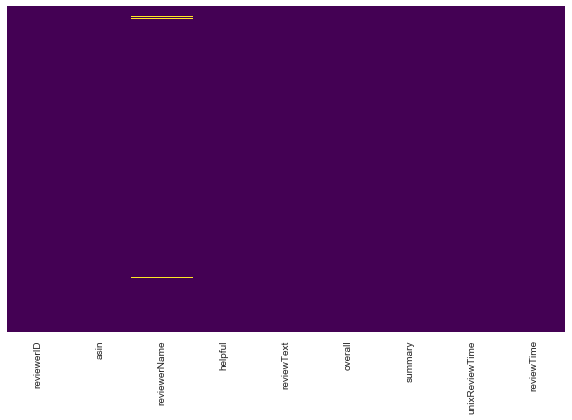

In [13]:
# Heatmap for missing values
plt.figure(figsize = (10,6))
sns.set()
_ = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
# Check for missing values
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      222
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

**Some information about dataset so far:**

This data includes 28798 rows(observations) and 9 columns(feature variables). 

Memory usage is 2.2+ MB. 

In the dataset, we have 7 object, 1 float64 and 1 int64 data types. 

222 'reviewerName' information is missing in the dataset. Since customer don't give their name, we should be suspicious about their reviews and ratings. I would prefer to drop the missing values from dataset  since we have enough observations to conclude a decision for sentiment analysis. 

We should concatenate 'reviewText' and 'summary' since both of them gives information about product, and also drop both 'reviewText' and 'summary' column at the end. 

'helpful' variable includes positive (thumbs up)  and negative (thumbs down) feedback for reviews' information, it will be splitted into two columns: positive feedback will be represented as "pos_feedback" , and negative feedback will be represented as "neg_feedback". Also, 'helpful' variable is represented as an object type in the dataset. We may convert it to numeric type for using in the following work. 

We should classify the 'overall' (ratings) as good, neutral and bad in order to make sentiment analysis. 

In the dataset, 'reviewerID' and 'reviwerName' are both for identification of customer. We should drop one of them from the dataset. Preferably, I will drop 'reviewerName' since customer names are not standardized and there are lots of different sytle to represent them.

'unixReviewTime' will be dropped since it has already been represented in 'reviewTime' feature in a more understandable format. Also, 'reviewTime' will be converted to datetime data type. 

We will rename the columns in order to improve practicality and the readibility of coding as stated below: 

- reviewerID : "customer"

- asin : "product"

- reviewerName : column will be dropped.

- helpful : positive feedback will be represented as "pos_feedback" , neutral feedback will be represented as "neut_feedback" and negative feedback will be represented as "neg_feedback".

- reviewText : This will be concatenated with "summary" and renamed as "review_text"

- overall : "Rating" 

- summary : it will be dropped after it is concatenated with "reviewerText".

- unixReviewTime : column will be dropped. 

- reviewTime : "time"

Now, we will practice all defined action items above. 

## Dropping Missing Values

In [15]:
# Drop missing customers who don't give their names
df2 = df.dropna(axis=0)

In [16]:
# Customer totals for each rating (after drop)
df2['overall'].value_counts()

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: overall, dtype: int64

## Concatenating 'reviewText' and 'summary' columns

In [17]:
# Concatenate 'reviewText' and 'summary' as review_text and drop them 
df2['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df2 = df2.drop(['reviewText', 'summary'], axis = 1)
df2.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...


## Spliting 'helpful' column into two separate columns

In [18]:
# Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end

list_positive = []
list_negative = []

for help in df2['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
df2['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
df2['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
df2.drop('helpful', axis = 1)

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0
5,A3IOCPLIMYDBCD,B0000CC64W,"Hummingbirder ""Don't ask for a man's soul whe...",5.0,1246665600,"07 4, 2009",Olay's Finest Olay Regenerist Daily Regenerati...,12,1
6,A5A3C6XVDYUND,B0000CC64W,Julia A. Andrews,3.0,1361145600,"02 18, 2013",Not bad but not a miracle worker Having found ...,1,1
7,A3V6Z4RCDGRC44,B0000CC64W,"Lisa Shea ""be the change you wish to see in t...",4.0,1183248000,"07 1, 2007",Nice Product - a Bit Greasy The Olay Regeneris...,6,1
8,A2WW57XX2UVLM6,B0000CC64W,Talvi,4.0,1385078400,"11 22, 2013",Clean and Easy I purchased this because it was...,0,0
9,A3M7R4PD0FEPUB,B0000CC64W,"T. K. Paul ""imatyak""",5.0,1254096000,"09 28, 2009",Noticed a difference immediately The first thi...,2,1


Converting data type is question mark!

## Classify the 'overall' (ratings) as good, neutral and bad

In [19]:
# Classify ratings as good
good_rate = len(df2[df2.overall > 3])
neut_rate = len(df2[df2.overall == 3])
bad_rate = len(df2[df2.overall < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for beauty products'.format(good_rate))
print ('Neutral ratings : {} reviews for beauty products'.format(neut_rate))
print ('Bad ratings : {} reviews for beauty products'.format(bad_rate))

Good ratings : 22425 reviews for beauty products
Neutral ratings : 4067 reviews for beauty products
Bad ratings : 2084 reviews for beauty products


In [20]:
# Apply the new classification to the ratings column
df2['rating_class'] = df['overall'].apply(lambda x: 'bad' if x < 3 else('good' if x > 3 else 'neutral'))
df2

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad
5,A3IOCPLIMYDBCD,B0000CC64W,"Hummingbirder ""Don't ask for a man's soul whe...","[12, 13]",5.0,1246665600,"07 4, 2009",Olay's Finest Olay Regenerist Daily Regenerati...,12,1,good
6,A5A3C6XVDYUND,B0000CC64W,Julia A. Andrews,"[1, 2]",3.0,1361145600,"02 18, 2013",Not bad but not a miracle worker Having found ...,1,1,neutral
7,A3V6Z4RCDGRC44,B0000CC64W,"Lisa Shea ""be the change you wish to see in t...","[6, 7]",4.0,1183248000,"07 1, 2007",Nice Product - a Bit Greasy The Olay Regeneris...,6,1,good
8,A2WW57XX2UVLM6,B0000CC64W,Talvi,"[0, 0]",4.0,1385078400,"11 22, 2013",Clean and Easy I purchased this because it was...,0,0,good
9,A3M7R4PD0FEPUB,B0000CC64W,"T. K. Paul ""imatyak""","[2, 3]",5.0,1254096000,"09 28, 2009",Noticed a difference immediately The first thi...,2,1,good


We have a new column named as 'rating_class' consists of three classes such as 'Good, Neutral and Bad' after applying the new classification. 

## Droping duplicate column about customer ('reviwerName')

In [21]:
# Drop 'reviewName' column 
df2.drop('reviewerName', axis = 1)

,reviewerID,asin,helpful,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad
5,A3IOCPLIMYDBCD,B0000CC64W,"[12, 13]",5.0,1246665600,"07 4, 2009",Olay's Finest Olay Regenerist Daily Regenerati...,12,1,good
6,A5A3C6XVDYUND,B0000CC64W,"[1, 2]",3.0,1361145600,"02 18, 2013",Not bad but not a miracle worker Having found ...,1,1,neutral
7,A3V6Z4RCDGRC44,B0000CC64W,"[6, 7]",4.0,1183248000,"07 1, 2007",Nice Product - a Bit Greasy The Olay Regeneris...,6,1,good
8,A2WW57XX2UVLM6,B0000CC64W,"[0, 0]",4.0,1385078400,"11 22, 2013",Clean and Easy I purchased this because it was...,0,0,good
9,A3M7R4PD0FEPUB,B0000CC64W,"[2, 3]",5.0,1254096000,"09 28, 2009",Noticed a difference immediately The first thi...,2,1,good


## Arranging Time columns

In [22]:
# Drop 'unixReviewTime'
df2.drop('unixReviewTime', axis = 1)

,reviewerID,asin,reviewerName,helpful,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad
5,A3IOCPLIMYDBCD,B0000CC64W,"Hummingbirder ""Don't ask for a man's soul whe...","[12, 13]",5.0,"07 4, 2009",Olay's Finest Olay Regenerist Daily Regenerati...,12,1,good
6,A5A3C6XVDYUND,B0000CC64W,Julia A. Andrews,"[1, 2]",3.0,"02 18, 2013",Not bad but not a miracle worker Having found ...,1,1,neutral
7,A3V6Z4RCDGRC44,B0000CC64W,"Lisa Shea ""be the change you wish to see in t...","[6, 7]",4.0,"07 1, 2007",Nice Product - a Bit Greasy The Olay Regeneris...,6,1,good
8,A2WW57XX2UVLM6,B0000CC64W,Talvi,"[0, 0]",4.0,"11 22, 2013",Clean and Easy I purchased this because it was...,0,0,good
9,A3M7R4PD0FEPUB,B0000CC64W,"T. K. Paul ""imatyak""","[2, 3]",5.0,"09 28, 2009",Noticed a difference immediately The first thi...,2,1,good


In [53]:
# Convert time object to datetime
df2['time'] = df2.reviewTime.str.replace(',', "")
df2['time'] = pd.to_datetime(df2['time'], format = '%m %d %Y')

In [59]:
# Check the 'time' data type
type(df2.time[0])

pandas._libs.tslibs.timestamps.Timestamp

## Changing column names and their positions

In [ ]:
# Changing column positions

# Rename the columns
df2.columns = ['customer', 'product', 'rating', 'rating_class', 'pos_feedback', 'neg_feedback', 'time', 'review_text']

# Sample observation
df2.sample(5)

## Descriptive Statistics 

In [ ]:
# Read statistic summary of numeric variables
df2.describe()

In [ ]:
# Customer totals for each rating 
print('Customer totals for each rating group: \n{}'.format(df2['rating'].value_counts())

In [ ]:
# Customer totals for each rating 
print('Customer totals for each rating class: \n{}'.format(df2['rating_class'].value_counts())

In [ ]:
# Statistics of non-numeric variables

# Number of unique customers
print('Number of unique customers: {}'.format((len(df2)/len(df2['customer']).unique()))
      
# Number of unique products
print('\nNumber of unique customers: {}'.format((len(df2)/len(df2['product']).unique()))
      
# Review per customer
print('\nReview per customer: {}'.format((len(df2)/len(df2['customer'].unique()))))      

# Review per product 
print('\nReview per product: {}'.format((len(df2)/len(df2['product'].unique()))))     

**Descriptive Statistic Summary:**

* Rating:
  - Mean of the ratings is more than 4 out of 5. It means that people are tendentious to giving high ratings. "std" value (1.084) and percentile values show that 1 and 2 star ratings are rare. 
  - Small numbers of "ratings under 4" will decrease the predictability of these ratings. To overcome this problem we need to split the ratings in to two groups as "good" and "bad" ratings.

* total votes (t_votes) and positive votes (p_votes):
  - Their means are more than 3.0 but percentile values shows that more than half of the reviews don't have "helpful"votes.
  - They have outliers and should be cleaned or imputed. 

* Non-numeric variables statistics:
  - Some customers have more than one ratings and most probably we have some outliers.
  - All ratings do not belong to diffent different people

## Cleaning the new_text